In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import shap


data = pd.read_csv(r'C:\Users\Admin\Desktop\XAI HEART ATTACK PREDICTION\heart.csv')

# Encode categorical variables 
data = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)


X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No Heart Disease', 'Heart Disease'])
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy}")
print("Random Forest Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)




Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8695652173913043
Random Forest Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.84      0.84      0.84        77
   Heart Disease       0.89      0.89      0.89       107

        accuracy                           0.87       184
       macro avg       0.87      0.87      0.87       184
    weighted avg       0.87      0.87      0.87       184

Confusion Matrix:
[[65 12]
 [12 95]]


In [4]:
import shap
explainer = shap.TreeExplainer(best_rf_classifier)

selected_instance = X_test.iloc[0]


shap_values_instance = explainer.shap_values(selected_instance)


shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values_instance[1], selected_instance, link="logit")


In [32]:

individual_shap_values = explainer.shap_values(selected_instance)


for feature, shap_value in zip(X.columns, individual_shap_values[1]):
    print(f"Feature: {feature}, SHAP Value: {shap_value}")

# Detailed Explanation:
# - For the selected instance, the SHAP force plot visually explains how each feature contributes to the prediction.
# - Positive SHAP values indicate features pushing the prediction towards 'Heart Disease'.
# - Negative SHAP values indicate features pushing the prediction towards 'No Heart Disease'.
# - The exact numerical values of SHAP contributions for each feature are printed for detailed inspection.

Feature: Age, SHAP Value: 0.09056227082234508
Feature: RestingBP, SHAP Value: 0.0020495936730743703
Feature: Cholesterol, SHAP Value: -0.01850773416837079
Feature: MaxHR, SHAP Value: -0.0382604380372083
Feature: Oldpeak, SHAP Value: -0.045482941550367945
Feature: Sex_M, SHAP Value: -0.05472032174308313
Feature: ChestPainType_ATA, SHAP Value: -0.06119756751812558
Feature: ChestPainType_NAP, SHAP Value: 0.01319620798167503
Feature: ChestPainType_TA, SHAP Value: 0.0009549339657378859
Feature: FastingBS_1, SHAP Value: -0.015558084754208895
Feature: RestingECG_Normal, SHAP Value: -0.0067931714284375265
Feature: RestingECG_ST, SHAP Value: 0.0006171129968626948
Feature: ExerciseAngina_Y, SHAP Value: -0.07254606873125374
Feature: ST_Slope_Flat, SHAP Value: -0.0837994486784987
Feature: ST_Slope_Up, SHAP Value: -0.11011357716510878


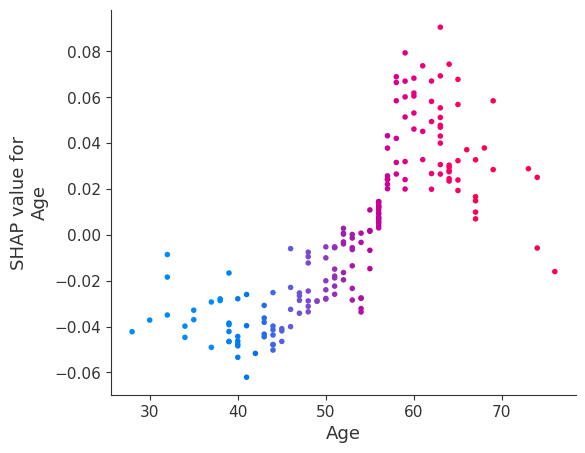

In [13]:
# Dependency Plot for Age
shap.dependence_plot("Age", shap_values[1], X_test, interaction_index="Age", display_features=X_test)

# Explanation of below Plot:
# - This plot shows the effect of Age on predictions.
# - Each dot represents a sample.
# - The x-axis represents Age, and the y-axis represents the SHAP values for Age.
# - The trend in the plot shows how Age influences predictions.
# - If dots are mostly above the zero line, it indicates older age contributes to Heart Disease.
# - If dots are mostly below the zero line, it indicates older age contributes to No Heart Disease.


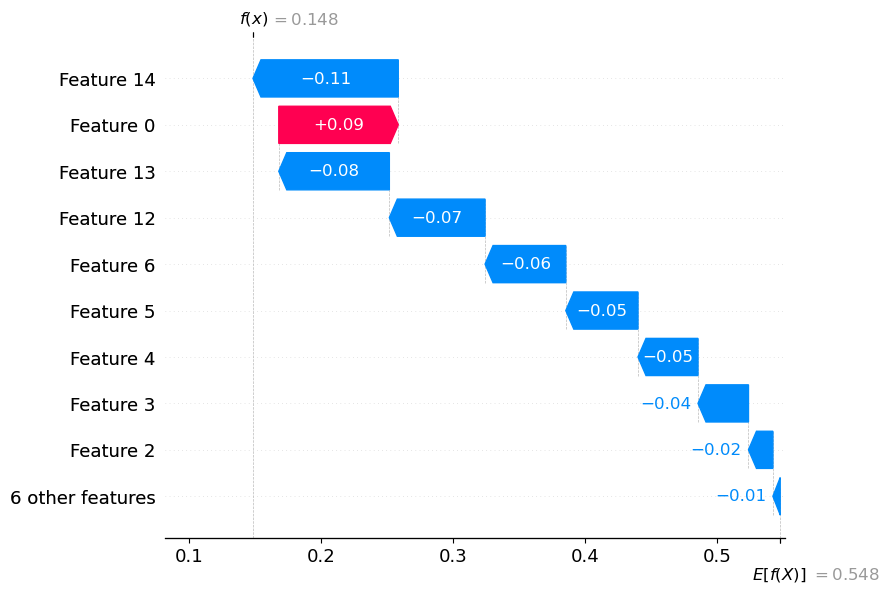

In [15]:

selected_instance = X_test.iloc[0]

shap_values_instance = explainer.shap_values(selected_instance)

# Waterfall Plot for the selected instance
shap.waterfall_plot(shap.Explanation(values=shap_values_instance[1], base_values=explainer.expected_value[1]), max_display=10)

# Explanation:
# The waterfall plot provides a detailed breakdown of the prediction for the selected instance.
# It shows how each feature contributes to the final prediction.
# Positive contributions push the prediction towards Heart Disease, and negative contributions push it towards No Heart Disease.



In [23]:
print("Shape of shap_values[0]:", shap_values[0].shape)
print("Shape of X_test:", X_test.shape)


Shape of shap_values[0]: (10, 15)
Shape of X_test: (184, 15)


In [24]:
X_test.reset_index(drop=True, inplace=True)


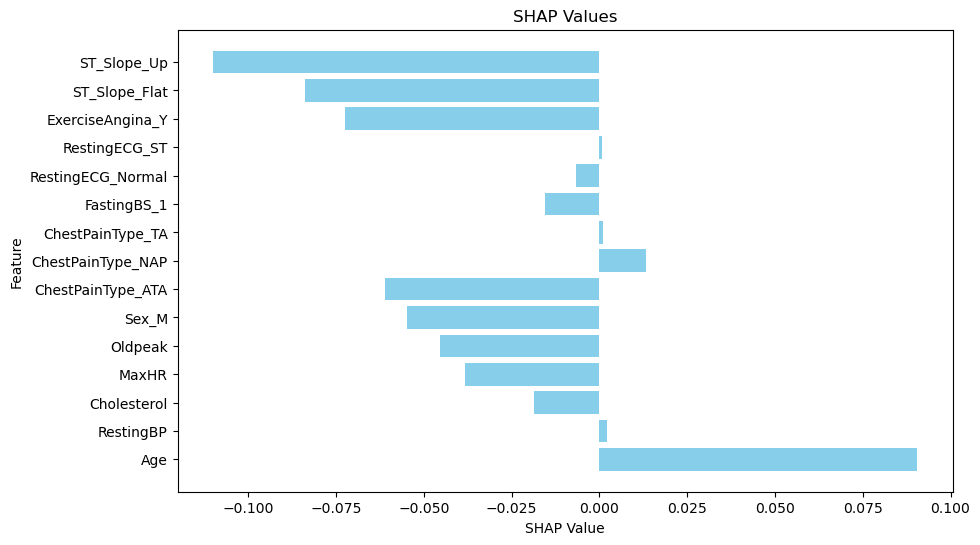

In [43]:
import matplotlib.pyplot as plt

feature_names = X.columns
shap_values_instance = individual_shap_values[1]

# Create a bar plot for SHAP values
plt.figure(figsize=(10, 6))
plt.barh(feature_names, shap_values_instance, color='skyblue')
plt.xlabel('SHAP Value')
plt.ylabel('Feature')
plt.title('SHAP Values')
plt.show()


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
The figure layout has changed to tight


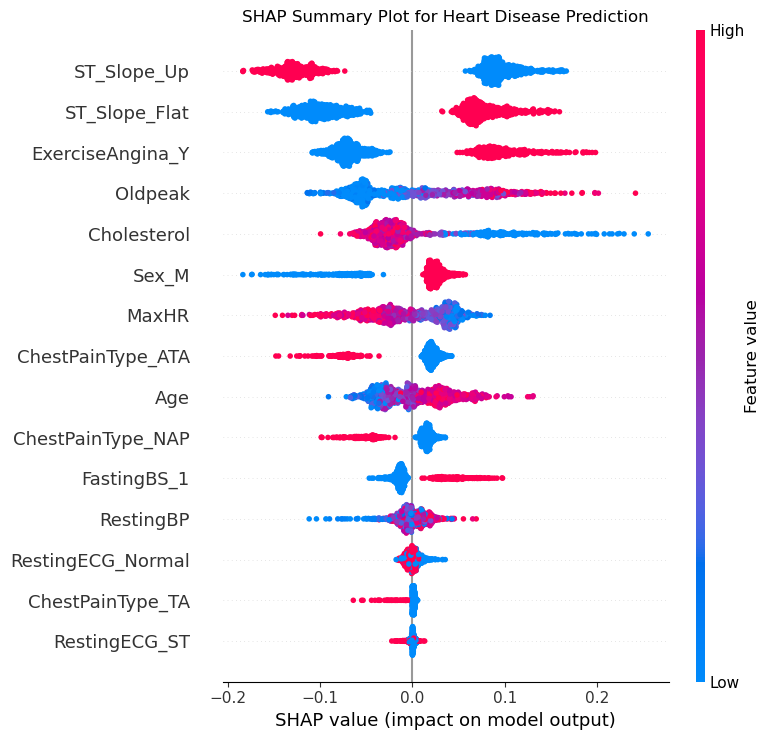

In [5]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(best_rf_classifier)
shap_values = explainer.shap_values(X)

# Create a summary plot
shap.summary_plot(shap_values[1], X, feature_names=X.columns, show=False)

plt.title('SHAP Summary Plot for Heart Disease Prediction')
plt.tight_layout()
plt.show()


The figure layout has changed to tight


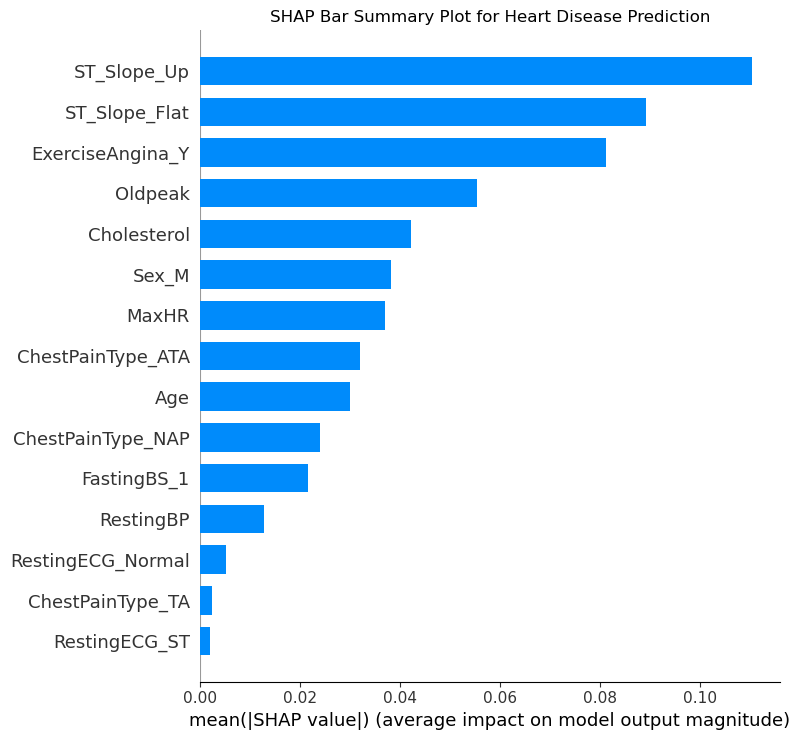

In [6]:
import shap
import matplotlib.pyplot as plt

# Calculate SHAP values for the entire dataset
explainer = shap.TreeExplainer(best_rf_classifier)
shap_values = explainer.shap_values(X)

# Create a bar summary plot
shap.summary_plot(shap_values[1], X, feature_names=X.columns, plot_type='bar', show=False)

plt.title('SHAP Bar Summary Plot for Heart Disease Prediction')
plt.tight_layout()
plt.show()


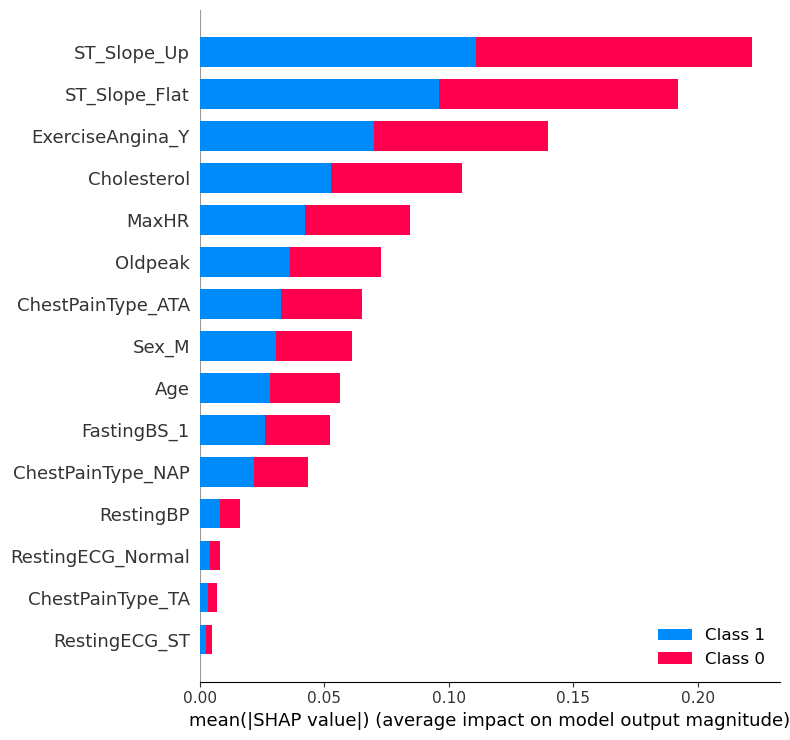

In [7]:

explainer = shap.TreeExplainer(best_rf_classifier)

# Calculate SHAP values for a subset of data 
shap_values = explainer.shap_values(X_test.iloc[:10])

shap.summary_plot(shap_values, X_test.iloc[:10], plot_type="bar")

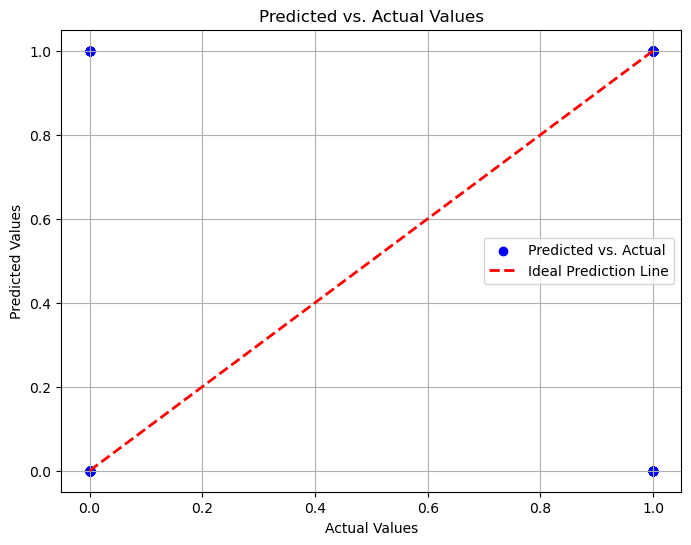

In [3]:
# Scatter plot for predicted vs. actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


data = pd.read_csv(r'C:\Users\Admin\Desktop\XAI HEART ATTACK PREDICTION\heart.csv')

# Count missing values filled
missing_values_count = data.isnull().sum().sum()

# Encode categorical variables 
encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(data[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']])
categorical_variables_encoded = encoded_data.shape[1]

# Scale numerical features (excluding the encoded categorical features)
numerical_features = data.drop(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)
numerical_features_scaled = scaled_features.shape[1]


print("Number of Missing Values Filled:", missing_values_count)
print("Number of Categorical Variables Encoded:", categorical_variables_encoded)
print("Number of Numerical Features Scaled:", numerical_features_scaled)


Number of Missing Values Filled: 0
Number of Categorical Variables Encoded: 10
Number of Numerical Features Scaled: 6
